# Data converter
used for conveting data for rastermap input

In [1]:
import sys
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from rastermap import Rastermap, utils

sys.path.append("/home/gergely/code/sleep/src")

from suite2p_class import Suite2p as s2p
import imaging_data_class as idc

In [23]:
mouse_id = "140503_2"
imaging_data = idc.ImagingData(mouse_id=mouse_id)
s2p_folders = [
    (index, folder) for index, folder in enumerate(imaging_data.find_suite2p_folders())
]
s2p_folders

Searching for suite2p folders in /data2/gergely/invivo_DATA/sleep/140503_2


[(0,
  '/data2/gergely/invivo_DATA/sleep/140503_2/1_16/TSeries-01162024-0853_dendrite-001/TSeries-01162024-0853_dendrite-001.sima/suite2p'),
 (1,
  '/data2/gergely/invivo_DATA/sleep/140503_2/1_12/TSeries-01122024-0738_GC1-001/TSeries-01122024-0738_GC1-001.sima/suite2p'),
 (2,
  '/data2/gergely/invivo_DATA/sleep/140503_2/1_10_24/TSeries-01102024-0803_GC1-001/TSeries-01102024-0803_GC1-001.sima/suite2p'),
 (3,
  '/data2/gergely/invivo_DATA/sleep/140503_2/1_10_24/TSeries-01102024-0803_GC2-002/TSeries-01102024-0803_GC2-002.sima/suite2p'),
 (4,
  '/data2/gergely/invivo_DATA/sleep/140503_2/1_18/TSeries-01182024-0805-001/TSeries-01182024-0805-001.sima/suite2p'),
 (5,
  '/data2/gergely/invivo_DATA/sleep/140503_2/1_17/TSeries-01172024-0745_dendrites-001/TSeries-01172024-0745_dendrites-001.sima/suite2p')]

In [24]:
s2p_data = s2p(s2p_folders[4][1])
spikes = s2p_data.get_spikes()
type(spikes)

numpy.ndarray

In [19]:
output_file = join(s2p_folders[4][1], "cell_spike.npy")
np.save(output_file, spikes)

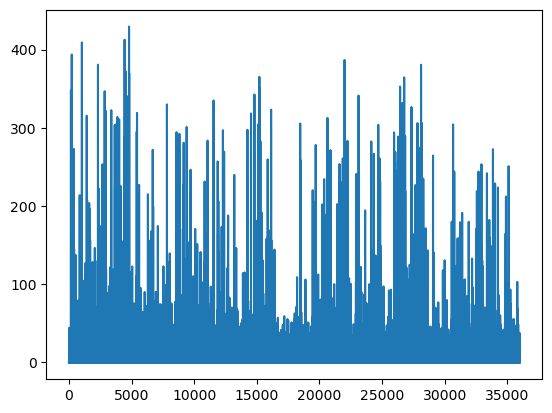

In [29]:
plt.plot(spikes[0])

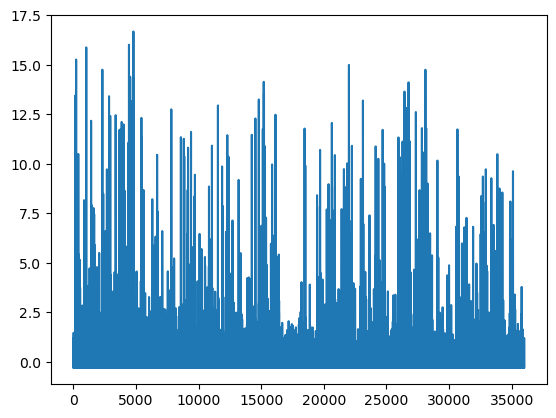

In [30]:
n_neurons, n_time = spikes.shape
spks = zscore(spikes, axis=1)
plt.plot(spks[0])